<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week7_Text_Processing_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Using Python libraries for complete text processing
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import TreebankWordTokenizer
from difflib import get_close_matches
from IPython.display import display

# Ensure required resources are available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample sentence
sentence = "In a remote village cradled between two vast snow-covered mountains, the people lived by the quiet rhythms of the seasons. The village was not large, and it was not wealthy, but it was old, and it was known across the valley for one peculiar tradition. Each home possessed a lantern made of glass so clear it shimmered like ice, and inside each lantern was a source of light that could not be explained by flame, oil, or electricity. These lanterns only glowed in the presence of real, unshakable hope. They did not respond to passing joy or fleeting moments of laughter. They could not be fooled by false optimism or hollow smiles. Only the quiet, steady flame of true hope could awaken them. Over the years, the villagers had come to revere these lanterns, not as relics of magic or superstition, but as reflections of the human spirit. When a lantern glowed, it meant someone inside still believed in something better, still had faith in the days to come, even when things were hard. It was a light that came from within. Most homes glowed softly each night. Some flickered brighter on holidays or after good news. Others dimmed when sorrow passed through but always returned in time. Yet one cottage remained completely dark. Tucked at the edge of the forest, half-covered by ivy and the heavy droop of winter branches, stood the home of Eli. He had once been a lively boy with dirt on his cheeks and dreams in his eyes. He was the son of a storyteller and a gardener. His father’s voice used to carry through the woods as he spun tales that made even the trees lean in to listen, and his mother’s hands had a way of bringing life to anything she touched. The lantern in their home glowed constantly then, so brightly it lit the nearby trees and startled birds into flight. But then came the winter storm. The kind of storm that buries paths and silences the world. His father never came back from a supply run through the mountain pass. The search lasted for days, then weeks, and when it ended, there was no body, only a piece of his scarf found near a ravine. His mother grew quiet after that. Her laughter became rare. Her gardening tools gathered rust. One spring morning, she sat down in the garden and never stood again. From that day, Eli became a shadow. He remained in the house, now much too big for one person, and carved animals from wood. It was something his father had taught him. Bears, wolves, foxes, owls—his shelves were filled with silent guardians. He spoke to no one unless necessary and ignored the whispers in the village about the boy who lived in the house with the dark lantern. Years passed like falling snow, each one burying him a little deeper in solitude. Then one morning, just as the sun began to rise, casting a pale silver light over the landscape, Eli heard a sound that did not belong. It was a soft thump against the windowpane. He turned and saw a small bird lying in the snow, its wing twisted and its body barely moving. Without thinking, he stepped outside in his slippers and lifted the bird gently. Its feathers were soaked, its eyes barely open. He carried it inside, wrapped it in a wool scarf, and set it beside the fireplace. He warmed water and soaked breadcrumbs, feeding it slowly with a spoon. He expected it to die. But it didn’t. It lived. It chirped softly a few hours later. The sound startled him. He hadn’t heard such a thing in his home in years. Over the next few days, the bird regained strength. Eli made a perch from a twisted branch and placed it near the window. He found himself speaking aloud more often, not because he expected the bird to understand, but because the silence had become unbearable. He told it about the weather, about his carvings, about the way the trees groaned in the wind. He even told it stories his father had once told him. It was strange, feeling his own voice return, weak at first like the bird’s chirps, then growing stronger. On the seventh night, as snow fell softly outside and Eli sat carving a tiny likeness of the bird in wood, a glow appeared at the edge of his vision. At first he ignored it, thinking it was the fire playing tricks. But it persisted. He turned his head and froze. The lantern, dusty and untouched for years, was glowing. It glowed as if it had never stopped. A rich, golden light pulsed within it, steady and warm. He stood and walked toward it slowly, as though it might vanish if he moved too fast. He placed his hand on the glass. It was warm to the touch. Tears welled in his eyes, not because he fully understood why it had lit, but because he suddenly realized how badly he had needed it to. That night, villagers noticed the light through the trees. One by one, they paused at their windows, eyes wide. Some smiled. Some whispered prayers of thanks. No one said anything to Eli. They didn’t need to. The light said it all. In the days that followed, Eli’s door remained open more often. Children began to appear at the edge of his yard, pointing at the bird or the wooden carvings in the window. He began to teach them how to whittle small animals. He said little, but smiled often. His silence was no longer a shield but a kind of peace. The bird stayed all winter. When spring came, it flew from the window and returned often. The light in the lantern never faded. It did not burn because everything was perfect. It burned because Eli had chosen to care again, to open his heart even a little. It burned because he had chosen to act with kindness, even when he expected nothing in return. And so, in that quiet cottage between the trees, a man who had once been buried in grief found his way back to the world through a single fragile life, and the smallest act of love lit the darkness that had lived inside him for years. The village remembered his story long after he was gone, not because it was loud or heroic, but because it reminded them that hope, once reignited, could outshine even the coldest winter."

print("\nOriginal Sentence:\n", sentence)

# Step 1: Normalization
normalized_text = re.sub(r'[^\w\s/]', '', sentence.lower())
print("\nNormalized Text:\n", normalized_text)

# Step 2: Tokenization
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(normalized_text)
print("\nTokens:\n", tokens)

# Step 3: Stop word removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]
print("\nFiltered Tokens (Stopwords Removed):\n", filtered_tokens)

# Step 4: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
print("\nLemmatized Tokens:\n", lemmatized_tokens)

# Step 5: Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print("\nStemmed Tokens:\n", stemmed_tokens)

# Step 6: Case Folding Examples
case_folding_examples = pd.DataFrame({
    "Original": ["Fed", "fed", "SAIL", "sail", "General Motors", "general motors"],
    "Folded": ["fed", "fed", "sail", "sail", "general motors", "general motors"]
})
print("\nCase Folding Examples:")
print(case_folding_examples.to_string(index=False))

# Step 7: Soundex (Phonetic Approximation)
soundex_demo = get_close_matches("automobile", ["car", "automobile", "truck", "vehicle", "kart"])
print("\nSoundex-style Matches for 'automobile':\n", soundex_demo)

# Final DataFrame Assembly
text_processing_df = pd.DataFrame({
    "Original": tokens,
    "Filtered (No Stopwords)": filtered_tokens + [''] * (len(tokens) - len(filtered_tokens)),
    "Lemmatized": lemmatized_tokens + [''] * (len(tokens) - len(lemmatized_tokens)),
    "Stemmed": stemmed_tokens + [''] * (len(tokens) - len(stemmed_tokens))
})

print("\nFinal Processed DataFrame:")
display(text_processing_df)



Original Sentence:
 In a remote village cradled between two vast snow-covered mountains, the people lived by the quiet rhythms of the seasons. The village was not large, and it was not wealthy, but it was old, and it was known across the valley for one peculiar tradition. Each home possessed a lantern made of glass so clear it shimmered like ice, and inside each lantern was a source of light that could not be explained by flame, oil, or electricity. These lanterns only glowed in the presence of real, unshakable hope. They did not respond to passing joy or fleeting moments of laughter. They could not be fooled by false optimism or hollow smiles. Only the quiet, steady flame of true hope could awaken them. Over the years, the villagers had come to revere these lanterns, not as relics of magic or superstition, but as reflections of the human spirit. When a lantern glowed, it meant someone inside still believed in something better, still had faith in the days to come, even when things wer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Original,Filtered (No Stopwords),Lemmatized,Stemmed
0,in,remote,remote,remot
1,a,village,village,villag
2,remote,cradled,cradled,cradl
3,village,two,two,two
4,cradled,vast,vast,vast
...,...,...,...,...
1082,outshine,,,
1083,even,,,
1084,the,,,
1085,coldest,,,


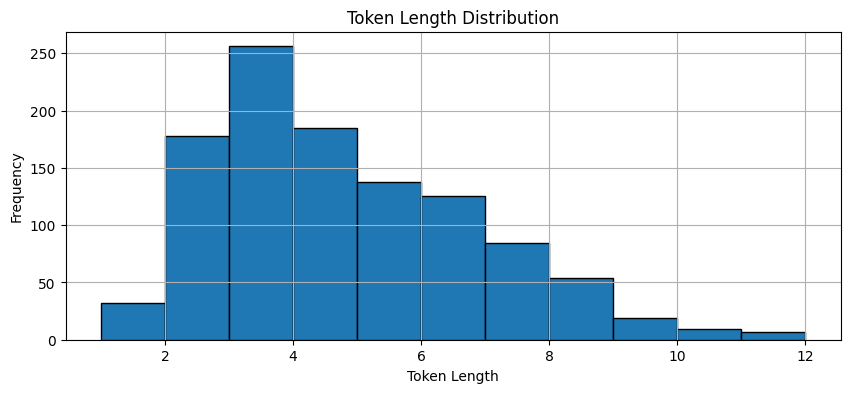

In [17]:
import matplotlib.pyplot as plt

token_lengths = [len(token) for token in tokens]
plt.figure(figsize=(10, 4))
plt.hist(token_lengths, bins=range(1, max(token_lengths)+1), edgecolor='black')
plt.title("Token Length Distribution")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

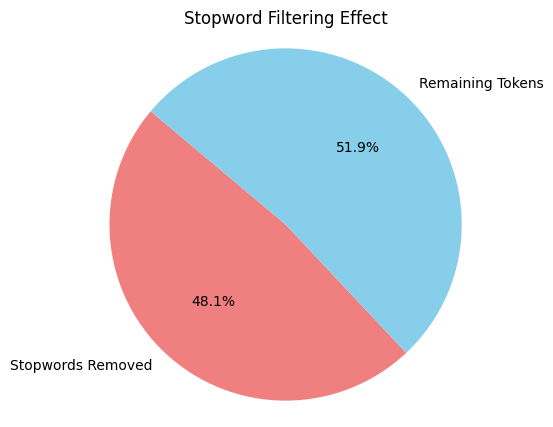

In [18]:
labels = ['Stopwords Removed', 'Remaining Tokens']
sizes = [len(tokens) - len(filtered_tokens), len(filtered_tokens)]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Stopword Filtering Effect")
plt.axis('equal')
plt.show()

In [19]:
import pandas as pd
from IPython.display import display

# Build comparison table
comparison_df = pd.DataFrame({
    "Original": sample_tokens,
    "Lemmatized": sample_lemmas,
    "Stemmed": sample_stems
})

# Display as visual table
display(comparison_df)



,Original,Lemmatized,Stemmed
0,quiet,quiet,quiet
1,village,village,villag
2,two,two,two
3,snowcapped,snowcapped,snowcap
4,mountains,mountain,mountain
...,...,...,...
127,whisper,whisper,whisper
128,enough,enough,enough
129,light,light,light
130,way,way,way


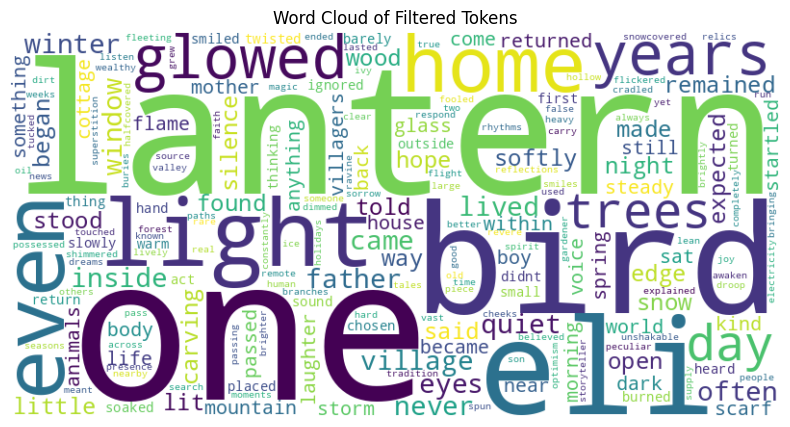

<ipython-input-21-5873f4ce02b3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


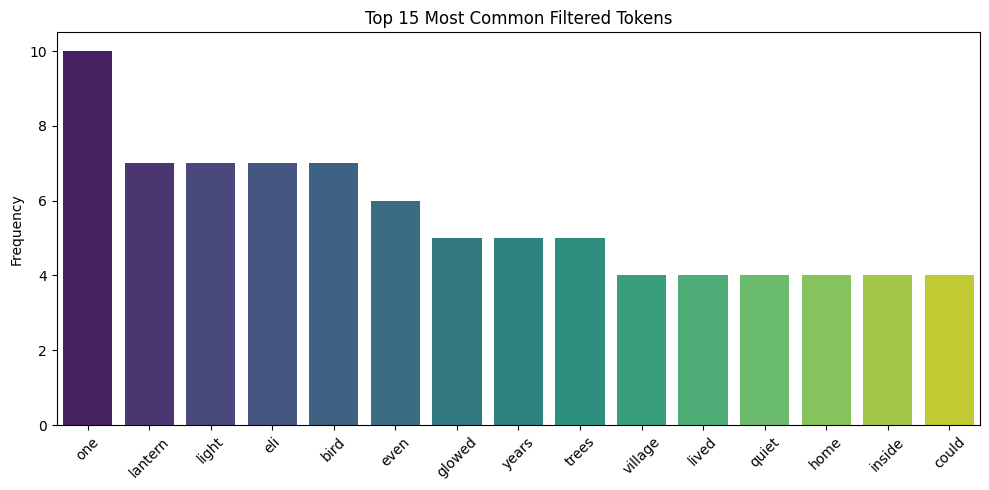

In [21]:
# Ensure equal length for visualization
limit = min(len(filtered_tokens), len(lemmatized_tokens), len(stemmed_tokens))
sample_tokens = filtered_tokens[:limit]
sample_lemmas = lemmatized_tokens[:limit]
sample_stems = stemmed_tokens[:limit]

# 1. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sample_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Filtered Tokens")
plt.show()

# 2. Term Frequency Bar Chart
token_freq = Counter(sample_tokens)
most_common = token_freq.most_common(15)
words, freqs = zip(*most_common)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(freqs), palette='viridis')
plt.title("Top 15 Most Common Filtered Tokens")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

